## Entrenamiento de modelos

### Importación de bibliotecas

In [1]:
#Importación de bibliotecas
from imblearn.metrics import geometric_mean_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
import joblib
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

### Carga de los datos
Se recogen los datos del fichero CSV generado con el Notebook "Extracción.ipynb".

In [2]:
df = pd.read_csv('../TFG/Outputs/Datos/datos.csv', sep=';', index_col=False)
df

,Max1.,Max2.,Max3.,Max4.,Max5.,Max6.,Max7.,Max8.,Max9.,Max10.,...,Diff7. norm.,Diff8. norm.,Diff9. norm.,Diff10. norm.,Mean time,Mean speed,Hand R(0)/L(1),Sex M(0)/W(1),Age,Parkinson
0,0.301561,0.301406,0.312076,0.301394,0.298748,0.344640,0.359823,0.335628,0.329234,0.332863,...,0.983009,0.914471,0.895536,0.911191,8.9,0.118006,0,1,71,0
1,0.362078,0.335549,0.283722,0.280966,0.291212,0.228908,0.229185,0.240358,0.238083,0.255766,...,0.585931,0.623436,0.571823,0.654275,12.5,0.059034,1,1,71,0
2,0.303023,0.283602,0.265378,0.290236,0.306413,0.275577,0.294769,0.299509,0.283839,0.282492,...,0.946385,0.960987,0.896750,0.898101,7.2,0.134156,0,1,73,0
3,0.332442,0.342932,0.341242,0.359438,0.360582,0.348706,0.329406,0.342690,0.341477,0.334383,...,0.853731,0.891237,0.881354,0.869447,9.7,0.105336,1,1,73,0
4,0.384571,0.361206,0.404770,0.366703,0.332424,0.380036,0.341502,0.361529,0.384088,0.367105,...,0.816661,0.877577,0.919868,0.882106,9.5,0.101239,0,0,71,0
5,0.535559,0.436309,0.465971,0.416307,0.431282,0.284341,0.292600,0.308507,0.326901,0.316095,...,0.526085,0.556693,0.601495,0.582173,10.8,0.065247,1,0,71,0
6,0.408016,0.406981,0.418365,0.422599,0.420967,0.455430,0.431094,0.458402,0.429863,0.410119,...,0.858746,0.981485,0.891521,0.887475,13.2,0.084195,0,1,82,0
7,0.304311,0.326252,0.344492,0.339462,0.346838,0.311599,0.293888,0.305954,0.300577,0.313729,...,0.824255,0.855785,0.853573,0.878305,13.4,0.071717,1,1,82,0
8,0.175107,0.174016,0.173306,0.227671,0.219903,0.219141,0.210079,0.235260,0.238453,0.242346,...,0.854650,0.916683,0.927684,0.924013,13.7,0.062915,0,0,78,0
9,0.276426,0.282573,0.294726,0.286404,0.268547,0.290330,0.266942,0.251532,0.272364,0.270153,...,0.800792,0.839033,0.733554,0.811896,15.3,0.058734,1,0,78,0


### Inicialización de variables
Se inicializan las variables necesarias para entrenar los modelos.

In [3]:
# Se eliminan las columnas que no mejoren los resultados de los modelos (los datos no normalizados, 
# Mean time y Age) y la clase (Parkinson) del conjunto de datos.
X = df.drop(columns=['Max1.', 'Max2.', 'Max3.', 'Max4.', 'Max5.', 'Max6.', 'Max7.', 'Max8.', 'Max9.', 'Max10.', 
            'Min1.', 'Min2.', 'Min3.', 'Min4.', 'Min5.', 'Min6.', 'Min7.', 'Min8.', 'Min9.', 'Min10.', 
            'Diff1.', 'Diff2.', 'Diff3.', 'Diff4.', 'Diff5.', 'Diff6.', 'Diff7.', 'Diff8.', 'Diff9.', 
            'Diff10.', 'Mean time', 'Age', 'Parkinson'])

# Se inicializa la matriz que contendrá la clase.
y = df['Parkinson']

# Métricas utilizadas en la validación cruzada
score = ['accuracy', make_scorer(matthews_corrcoef), 'f1', 'roc_auc', make_scorer(geometric_mean_score)]
nombres_scorer = ['accuracy', 'matthews_corrcoef', 'f1', 'roc_auc', 'g_mean']

# Inicialización del estado aleatorio que tendrán los modelos.
random_state = 55

# Modelos que se utilizarán para clasificar.
modelos = []
modelos.append(RandomForestClassifier(random_state=random_state))
modelos.append(KNeighborsClassifier())
modelos.append(DecisionTreeClassifier(random_state=random_state))
modelos.append(GaussianNB())
modelos.append(SVC(random_state=random_state))
modelos.append(MultinomialNB())
modelos.append(DummyClassifier(random_state=random_state))

# Nombres de los modelos.
nombres=['Random Forest', 'k-Nearest Neighbors', 'Árbol de decisión', 'Naive Bayes Gaussiano', 'SVM', 'Naive Bayes', 'Dummy']

# Obtención de los conjuntos de entrenamiento y test con los datos sin la clase
# y con los datos de la clase.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

### Entrenamiento de modelos y resultados
Se entrenan los modelos con cada métrica y se obtienen los resultados para concluir cuál es el mejor modelo para clasificar.

#### Obtención de las precisiones
Se obtienen las precisones medias de cada modelo utilizando validación cruzada con 2 divisiones y 5 repeticiones.

In [4]:
warnings.filterwarnings("ignore")
resultados=[]
for i in range(len(score)):
    aux=[]
    for modelo in modelos:
        cv = RepeatedStratifiedKFold(n_splits = 2, n_repeats = 5, random_state = random_state)
        precisiones = cross_val_score(modelo, X, y, cv=cv, scoring=score[i])
        aux.append(round(precisiones.mean(), 3))
    resultados.append(aux)

#### Representación de los resultados
Se representan las precisiones obtenidas en formato de tabla.

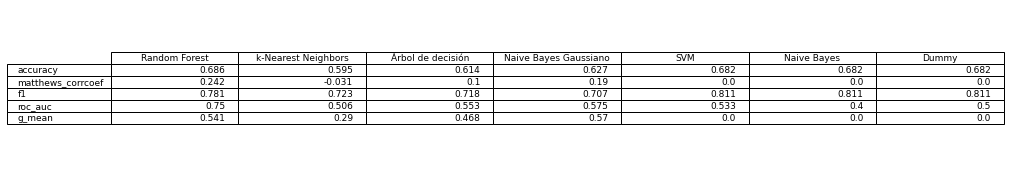

In [5]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 3)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=resultados,colLabels=nombres, rowLabels=nombres_scorer, loc="center")
plt.show()

### Exportación del modelo

Se exporta el modelo serializado para poder utilizarlo en otros archivos de Python.

In [6]:
modelos[0].fit(X_train, y_train)
joblib.dump(modelos[0], '..\TFG\Outputs\Modelos\modelo.pkl')

['..\\TFG\\Outputs\\Modelos\\modelo.pkl']